In [1]:
import torch
import os
import time
import torchvision

import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from torch.autograd import Variable

from gatys import Gatys
from AdaIN import AdaIN

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## AdaIN on Chinese Art Dataset 

Here we used 50 content images and one unique style

In [3]:
content_dir = "./Chinese_art_dataset/content_images/"
style_dir = "./Chinese_art_dataset/style_images/wuguanzhong_33.jpg"
save_path = "./Chinese_art_dataset/generated_images_AdaIN"
content_images = os.listdir(content_dir)
style_image = Image.open(style_dir).convert("RGB")

In [4]:
AdaIN_method = AdaIN().to(device)

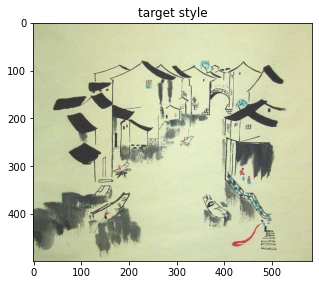

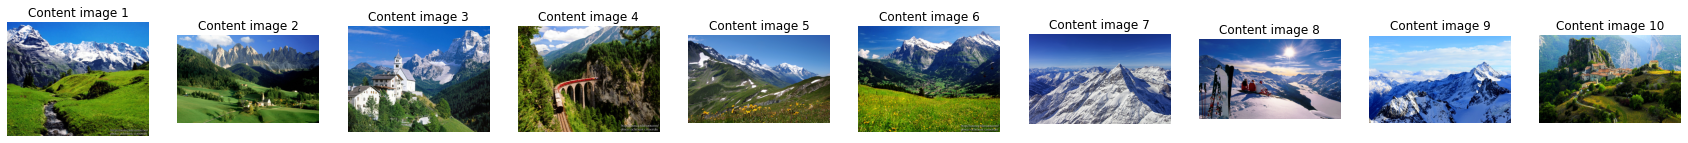

In [5]:
# Target Style
plt.figure(figsize=(5,5))
plt.imshow(style_image)
plt.title('target style')
plt.show()

#Samples from content images
nb_samples = 10
plt.figure(figsize=(3*nb_samples, 3))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path)
    
    plt.subplot(1, nb_samples, i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
plt.show()

Content Images: 100%|██████████| 50/50 [01:49<00:00,  2.19s/it]


Average computation time per image: 2.194017834663391


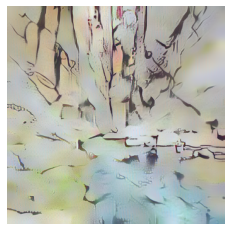

In [6]:
total_time = 0
num_pairs = 0
t0= time.time()
for content_image_name in tqdm(content_images, desc="Content Images"):
    content_image_path = os.path.join(content_dir, content_image_name)
    content_image = Image.open(content_image_path).convert("RGB")
    out_image = AdaIN_method.transfer_style(content_image, style_image)
    AdaIN_method.display_image(out_image)
    AdaIN_method.save_output_image(out_image, output_dir=save_path, filename=content_image_name)
tf= time.time()

print("Average computation time per image:", (tf-t0)/len(content_images))

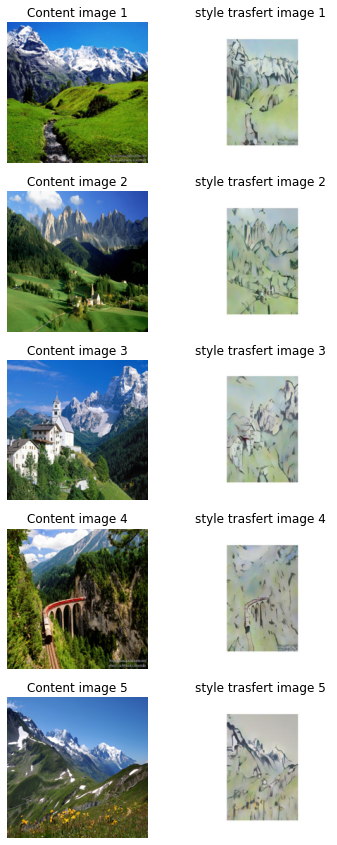

In [7]:
nb_samples = 5
plt.figure(figsize=(6, 3*nb_samples))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path).resize((200, 200))
    style_path = os.path.join(save_path, content_images[i])
    style = Image.open(style_path).resize((200, 200))
    plt.subplot(nb_samples,2, 2*i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
    plt.subplot(nb_samples,2, 2*i+2)  
    plt.imshow(style)
    plt.axis('off')  
    plt.title(f'style trasfert image {i+1}')
plt.show()



## Gatys et al method on Chinese Art Dataset 

Here we used 50 content images and one unique style. The optimization process was performed for 200 iterations

In [8]:
gatys_method = Gatys().to(device)
save_path = "./Chinese_art_dataset/generated_images_gatys"

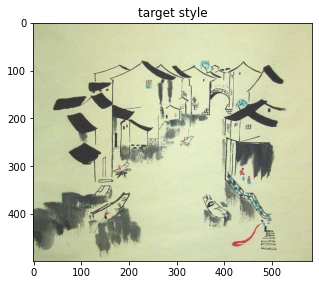

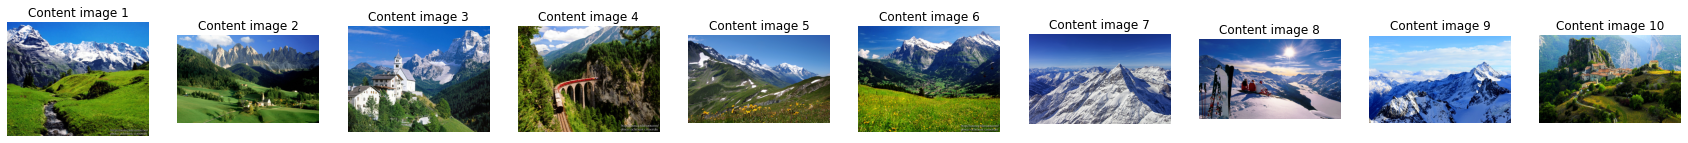

In [11]:
# Target Style
plt.figure(figsize=(5,5))
plt.imshow(style_image)
plt.title('target style')
plt.show()

#Samples from content images
nb_samples = 10
plt.figure(figsize=(3*nb_samples, 3))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path)
    
    plt.subplot(1, nb_samples, i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
plt.show()

Content Images: 100%|██████████| 50/50 [40:47<00:00, 48.95s/it]


Average computation time per image: 48.94886817932129


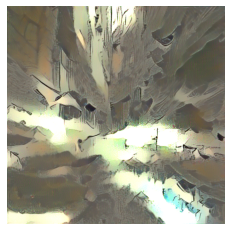

In [12]:
total_time = 0
num_pairs = 0
t0= time.time()
for content_image_name in tqdm(content_images, desc="Content Images"):
    content_image_path = os.path.join(content_dir, content_image_name)
    content_image = Image.open(content_image_path).convert("RGB")
    opt_img = gatys_method.prep(content_image).unsqueeze(0).data.clone() #initialization
    out_image = gatys_method.transfer_style(content_image, style_image, opt_img=opt_img,show_iter=0, max_iter=200)
    gatys_method.display_image(out_image)
    gatys_method.save_output_image(out_image, output_dir=save_path, filename=content_image_name)
tf= time.time()

print("Average computation time per image:", (tf-t0)/len(content_images))

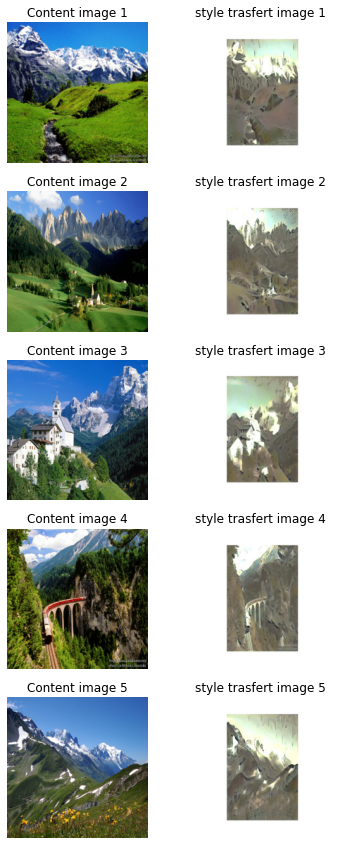

In [13]:
nb_samples = 5
plt.figure(figsize=(6, 3*nb_samples))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path).resize((200, 200))
    style_path = os.path.join(save_path, content_images[i])
    style = Image.open(style_path).resize((200, 200))
    plt.subplot(nb_samples,2, 2*i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
    plt.subplot(nb_samples,2, 2*i+2)  
    plt.imshow(style)
    plt.axis('off')  
    plt.title(f'style trasfert image {i+1}')
plt.show()
